In [38]:
# Step1 : Importing librairies and packages

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Step2 : Loading and viewing Data set

training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')

In [40]:
testing.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [41]:
# Step3 : Dealing with NaN values (imputation)

def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [42]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [43]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


C:\Users\aurel\AppData\Local\Temp\ipykernel_50888\612444480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(copy["Age"])


<Axes: xlabel='Age', ylabel='Density'>

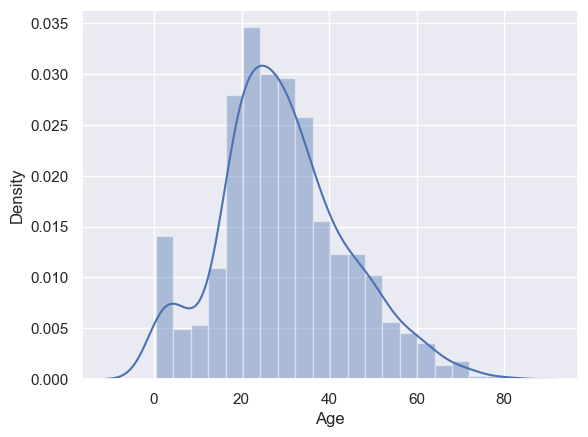

In [44]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

In [45]:

training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [46]:
#Step7 : Plotting and visualizing data

sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


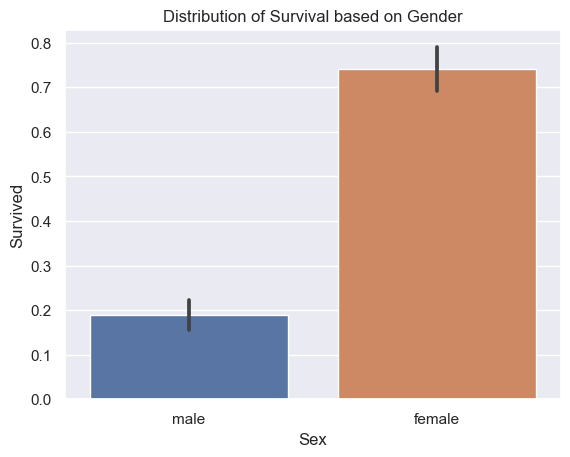

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [51]:
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

In [47]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")
#help(sns.barplot)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

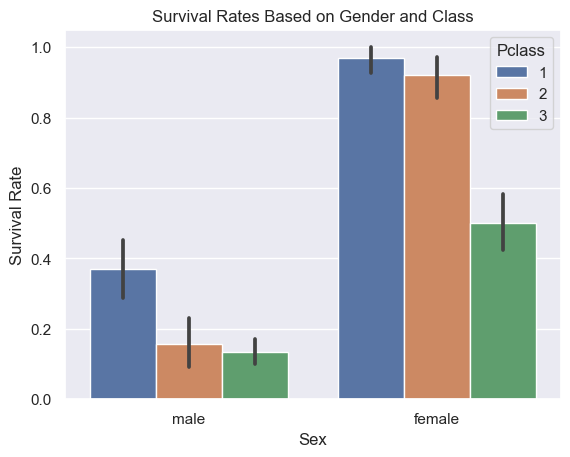

In [48]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

C:\Users\aurel\AppData\Local\Temp\ipykernel_50888\3553687024.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived_ages, kde=False)
C:\Users\aurel\AppData\Local\Temp\ipykernel_50888\3553687024.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_survived_ages, kde=False)


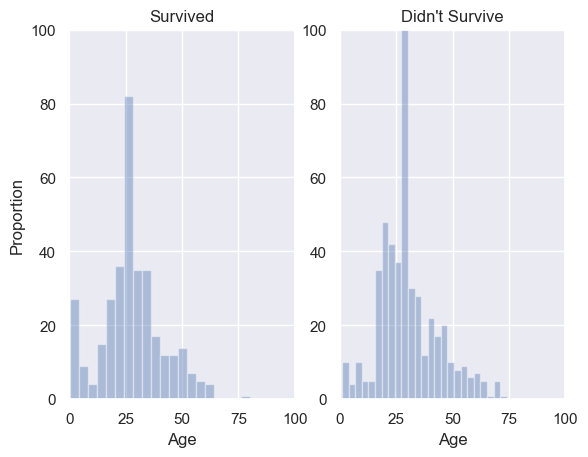

In [53]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

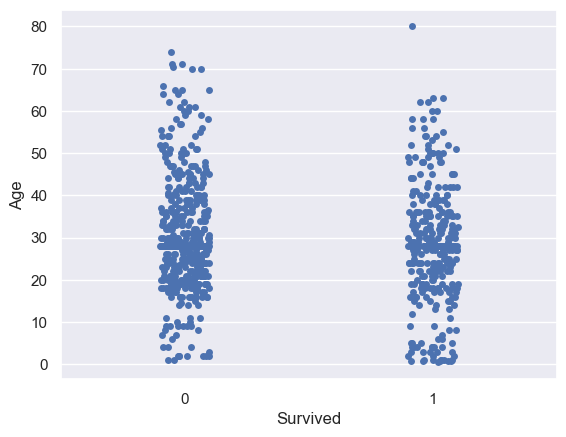

In [54]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

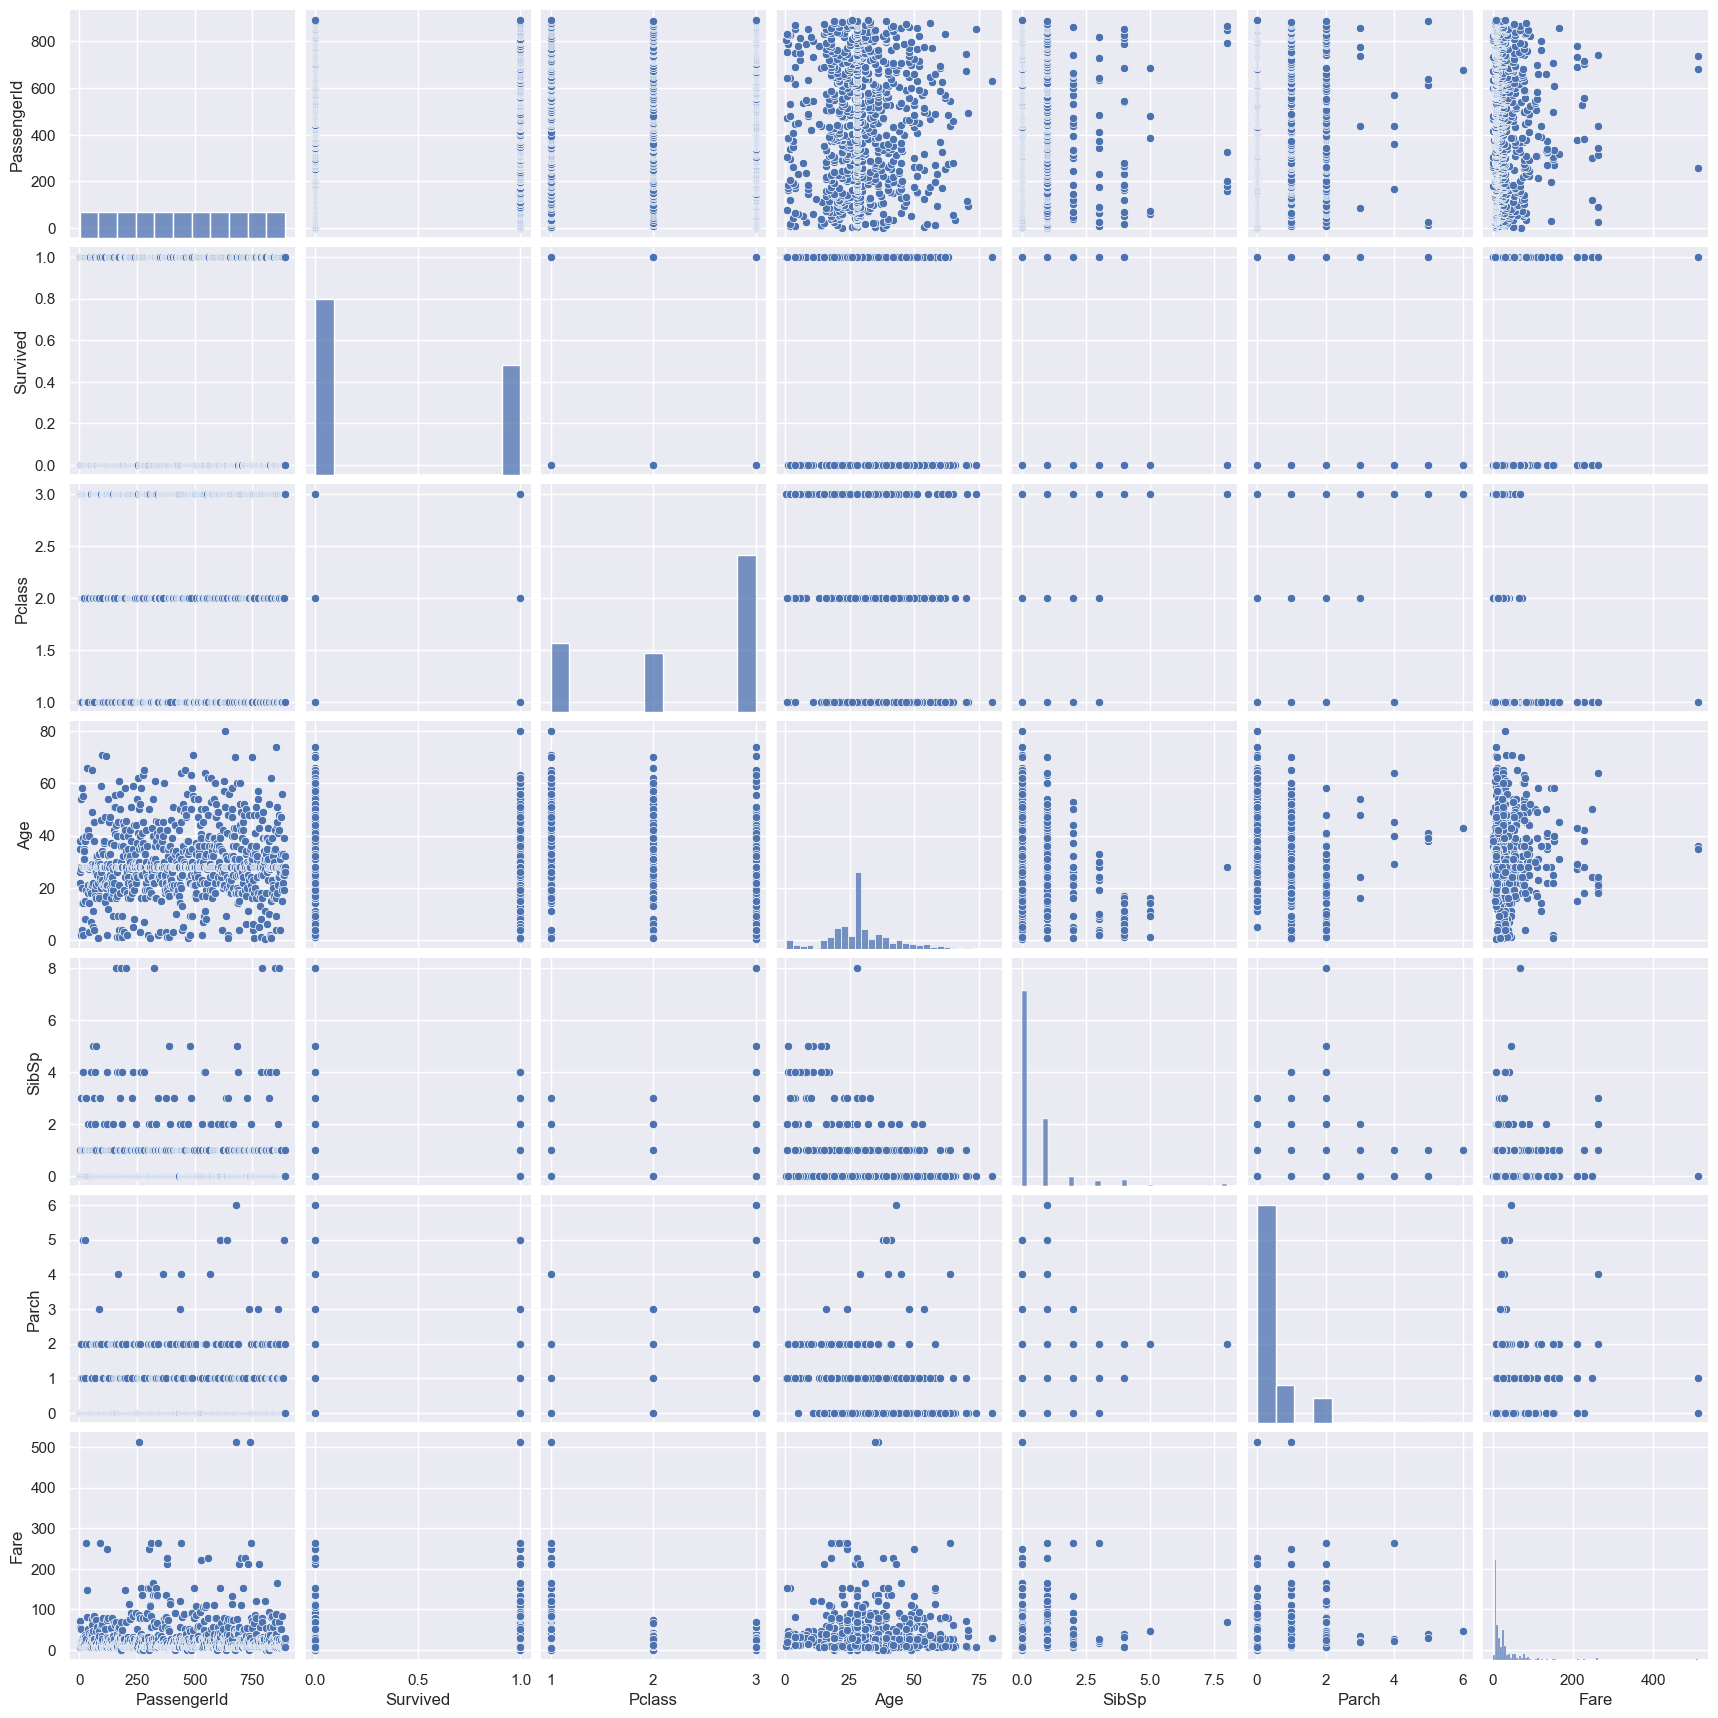

In [52]:
sns.pairplot(training)

In [36]:
#Step5 : Feature Engineering

training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1


training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1


testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2


In [13]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [15]:
#Step6 : Model fitting and predicting

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.model_selection import GridSearchCV

In [17]:
features = ["Pclass", "Sex", "Age", "Embarked", "Fare", "FamSize"]
X_train = training[features]et
y_train = training["Survived"] 
X_test = testing[features] 

In [18]:
from sklearn.model_selection import train_test_split 
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 

In [19]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print(acc_rf)

0.8547486033519553


In [20]:
#Step7 : Evalutating model performance

from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_valid, rf_clf.predict(X_valid))
cm

array([[100,  10],
       [ 16,  53]], dtype=int64)

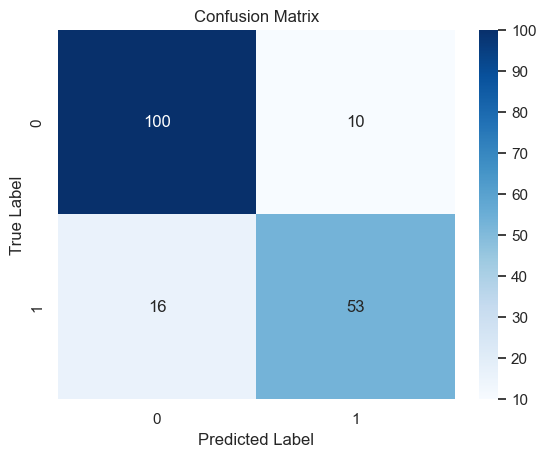

In [22]:
sns.set()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [23]:
model_performance = pd.DataFrame({
    "Model": ["Random Forest"],#, "XGBClassifier"],
    "Accuracy": [ acc_rf]#, acc_xg]
})

model_performance.sort_values(by="Accuracy", ascending=False)

Model  Accuracy
0  Random Forest  0.854749

In [25]:
# Step8: Tuning Parameters with GridSearchCV

rf_clf = RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }



In [26]:
grid_cv = GridSearchCV(rf_clf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(X_train, y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=15)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

logistic_Reg = LogisticRegression()
n_components = list(range(1,X_training.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)
grid_cv2 = GridSearchCV(logistic_Reg, parameters)
grid_cv2 = grid_cv.fit(X_train, y_train)
print("Our optimized logistic regression model is:")
grid_cv.best_estimator_

Our optimized logistic regression model is:


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=15)

In [29]:
optimal_model = grid_cv.best_estimator_
optimal_model.fit(X_train, y_train)
predict_optimal = optimal_model.predict(X_valid)
final_accuracy = accuracy_score(y_valid, predict_optimal)

In [30]:
print(final_accuracy)

0.8938547486033519


In [31]:
from sklearn.model_selection import learning_curve

[ 71 142 213 284 356 427 498 569 640 712]


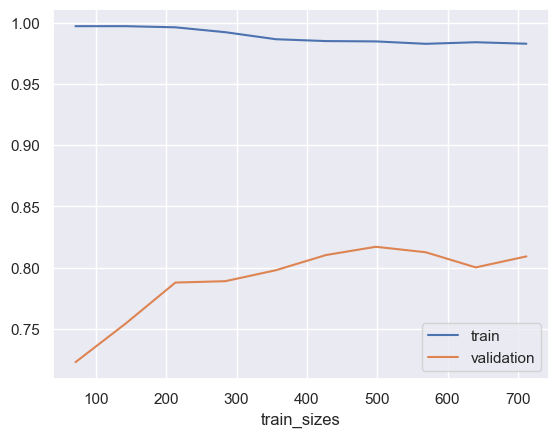

In [32]:
N, train_score, val_score = learning_curve(rf_clf, X_train, y_train, train_sizes= np.linspace(0.1,1,10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [34]:
submission_predictions =optimal_model.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
